# Correspondence Analysis

In [1]:
# Chargement des librairies
import pandas as pd
from scientisttools.decomposition import CA
from scientisttools.pyplot import plotCA,plot_cosines,plot_contrib,plot_eigenvalues
from scientisttools.extractfactor import get_eig,summaryCA
import matplotlib.pyplot as plt
from scientisttools.ggplot import fviz_ca_row,fviz_ca_col,fviz_ca

In [2]:
# Set directory
import os
os.chdir("d:\\Bureau\\PythonProject\\packages\\scientisttools\\data\\")

In [3]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFC_ETUDES",index_col=0) 
display(D)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,80,99,65,58
Patron,168,137,208,62
CadreSup,470,400,876,79
Employe,145,133,135,54
Ouvrier,166,193,127,129


CA(col_labels=Index(['Droit', 'Sciences', 'Medecine', 'IUT'], dtype='object'),
   figsize=(16, 8),
   row_labels=Index(['ExpAgri', 'Patron', 'CadreSup', 'Employe', 'Ouvrier'], dtype='object', name='CSP_vs_Filiere'))

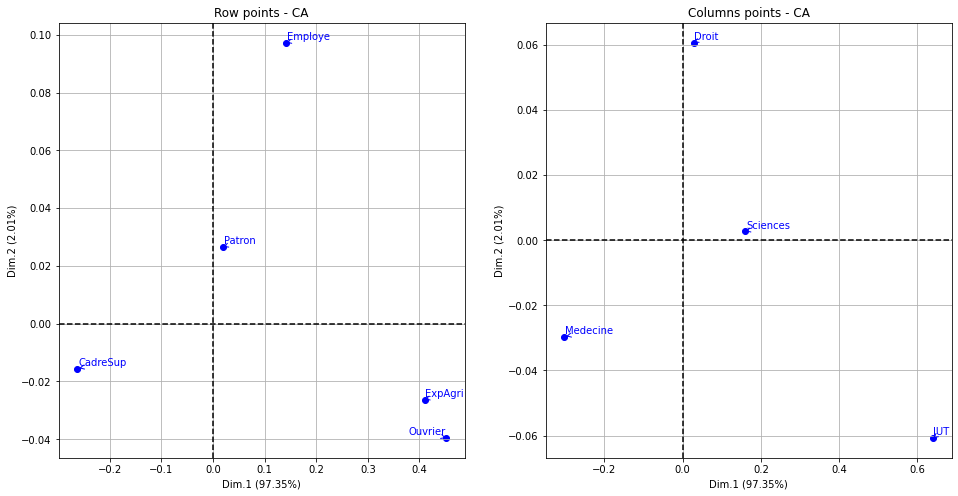

In [4]:
# Instanciation du modèle
my_ca = CA(n_components=None,
           row_labels=D.index,
           col_labels=D.columns,
           row_sup_labels=None,
           col_sup_labels=None,
           graph=True,
           figsize=(16,8))
my_ca.fit(D)

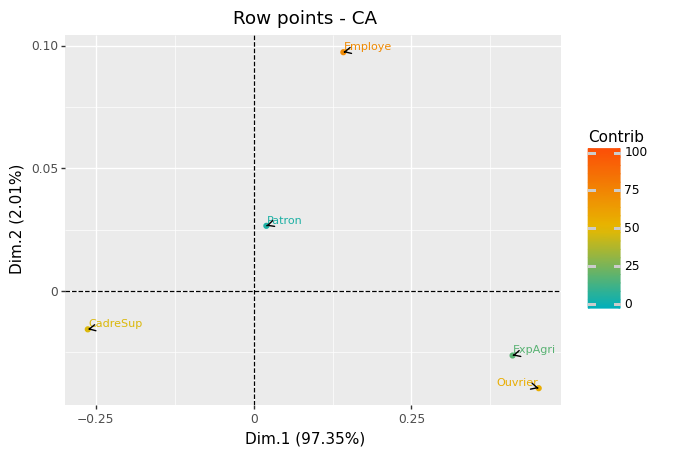

In [5]:
p = fviz_ca_row(my_ca,
                color="contrib",
                repel=True)
print(p)

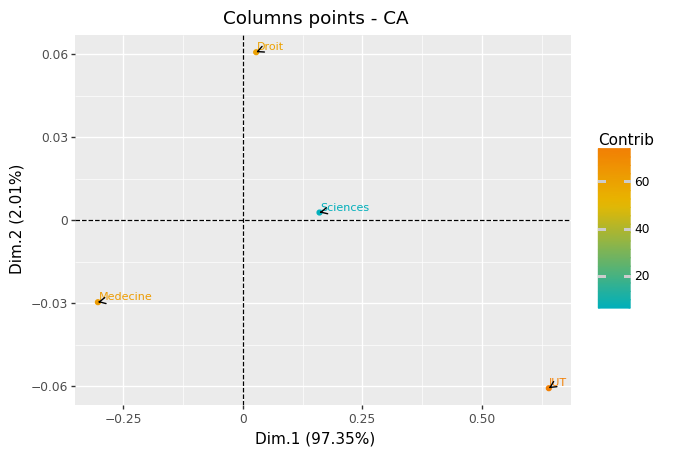

In [6]:
p = fviz_ca_col(my_ca,
                color="contrib",
                repel=True)
print(p)

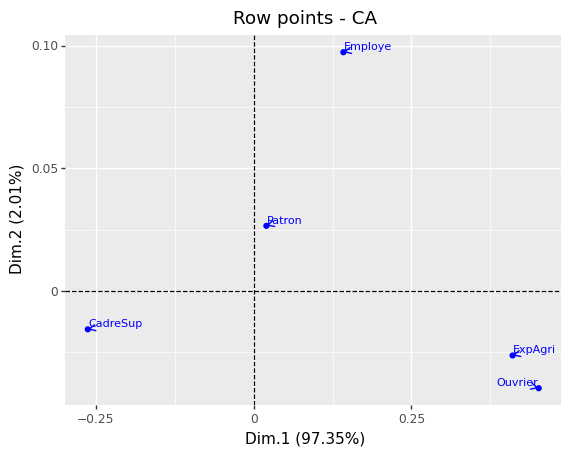

In [7]:
p = fviz_ca(my_ca,choice="row",color="blue",repel=True)
print(p)

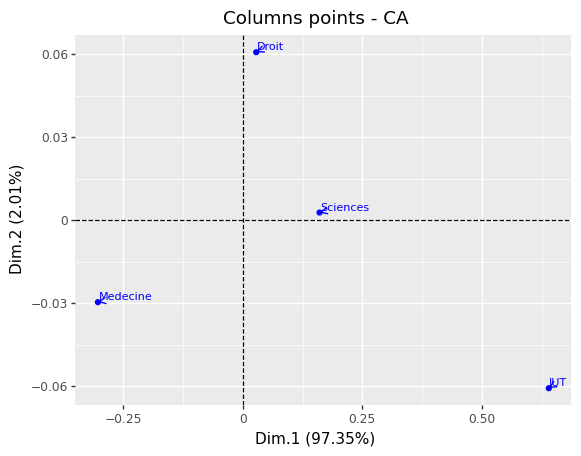

In [8]:
p = fviz_ca(my_ca,choice="col",color="blue",repel=True)
print(p)

In [9]:
eig = get_eig(my_ca)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,0.082394,0.080690,97.349552,97.349552
Dim.2,0.001703,0.001164,2.012656,99.362208
Dim.3,0.000540,NaN,0.637792,100.000000


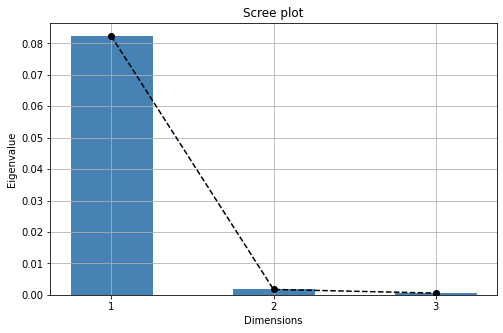

In [10]:
# 
fig, axe = plt.subplots(figsize=(8,5))
plot_eigenvalues(my_ca,choice="eigenvalue")

In [11]:
pd.DataFrame(my_ca.chi2_test_,index =["chi2"])

,statistic,pvalue,dof
chi2,320.265872,2.582613e-61,12


## Extraction des résultats

### Résultats sur les profils lignes

In [12]:
from scientisttools.extractfactor import get_ca
row = get_ca(my_ca,choice="row")
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'res.dist', 'infos'])


#### Coordonnées des profils lignes

In [13]:
# Coordonnées des profils lignes
row_coord = row["coord"]
display(row_coord)

,Dim.1,Dim.2,Dim.3
CSP_vs_Filiere,,,
ExpAgri,0.410115,-0.026253,0.038284
Patron,0.020151,0.026585,-0.046881
CadreSup,-0.262717,-0.015596,0.006199
Employe,0.142090,0.097326,0.021242
Ouvrier,0.451481,-0.039588,-0.009493


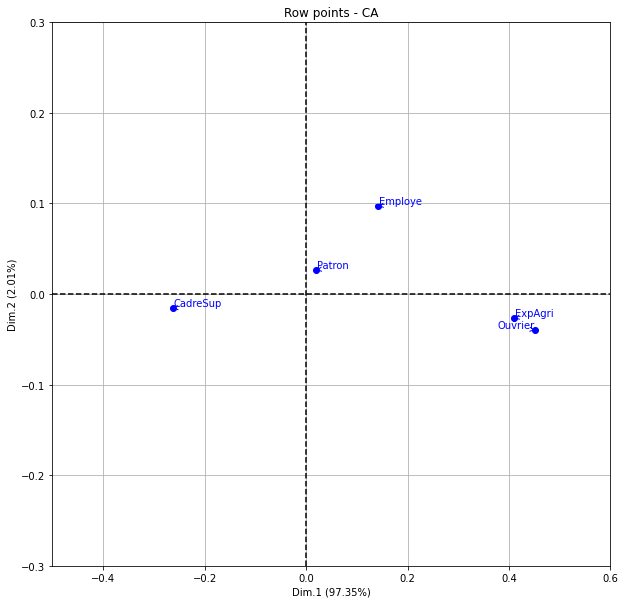

In [14]:
# Représentation des profils lignes
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,xlim=(-0.5,0.6),ylim=(-0.3,0.3),repel=True,ax=axe)

In [15]:
# Cosinus carré
row_cos2 = row["cos2"]
display(row_cos2)

,Dim.1,Dim.2,Dim.3
CSP_vs_Filiere,,,
ExpAgri,0.987350,0.004046,0.008604
Patron,0.122652,0.213489,0.663859
CadreSup,0.995936,0.003510,0.000554
Employe,0.670459,0.314556,0.014984
Ouvrier,0.991935,0.007627,0.000439


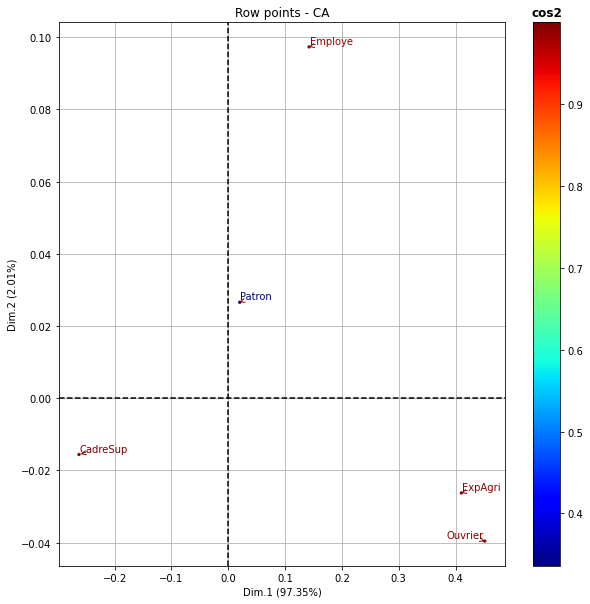

In [16]:
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,color="cos2",repel=True,ax=axe)

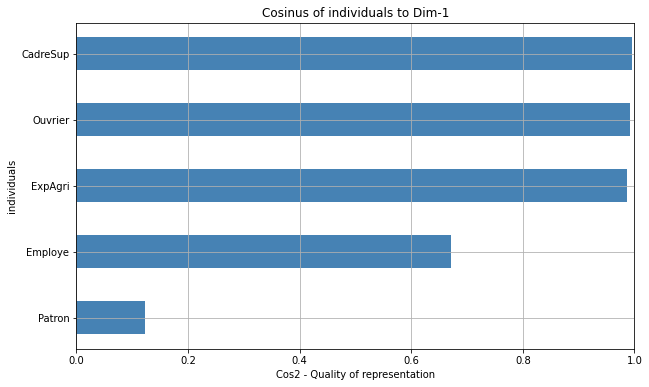

In [17]:
# 
fig, axe = plt.subplots(figsize=(10,6))
plot_cosines(my_ca,choice="ind",ax=axe)

In [18]:
# Contribution
row_contrib = row["contrib"]
display(row_contrib)

,Dim.1,Dim.2,Dim.3
CSP_vs_Filiere,,,
ExpAgri,16.292006,3.229165,21.669399
Patron,0.074887,6.304816,61.867745
CadreSup,40.401242,6.886489,3.433167
Employe,3.024136,68.626434,10.316292
Ouvrier,40.207729,14.953096,2.713396


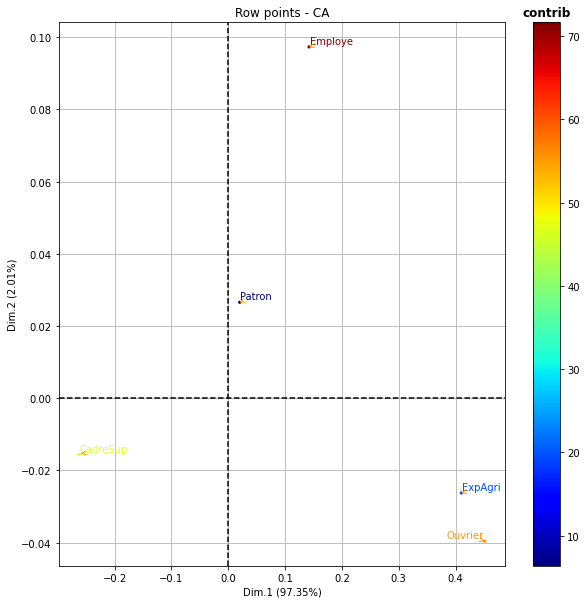

In [19]:
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,color="contrib",repel=True,ax=axe)

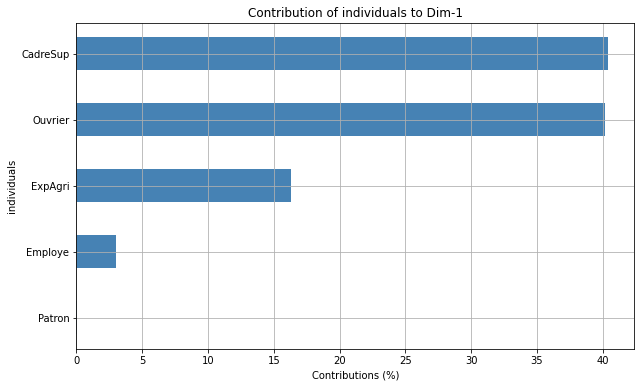

In [20]:
fig,axe = plt.subplots(figsize=(10,6))
plot_contrib(my_ca,choice="ind",ax=axe)

In [21]:
# Distances resituées
res_row_dist = row["res.dist"]
display(res_row_dist)

CSP_vs_Filiere,ExpAgri,Patron,CadreSup,Employe,Ouvrier
CSP_vs_Filiere,,,,,
ExpAgri,0.000000,0.162117,0.453847,0.087400,0.004172
Patron,0.162117,0.000000,0.084611,0.024514,0.191823
CadreSup,0.453847,0.084611,0.000000,0.176847,0.510901
Employe,0.087400,0.024514,0.176847,0.000000,0.115413
Ouvrier,0.004172,0.191823,0.510901,0.115413,0.000000


In [22]:
# Informations sur les profils lignes
row_infos = row["infos"]
display(row_infos)

,"d(i,G)",p(i),"I(i,G)"
CSP_vs_Filiere,,,
ExpAgri,0.170350,0.079810,0.013596
Patron,0.003311,0.151956,0.000503
CadreSup,0.069302,0.482294,0.033424
Employe,0.030113,0.123414,0.003716
Ouvrier,0.205492,0.162526,0.033398


### Analyse des profils colonnes

In [23]:
col = get_ca(my_ca,choice="col")
print(col.keys())

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'res.dist', 'infos'])


#### Coordonnées des profils colonnes

In [24]:
# Coordonnées des profils colonnes
col_coord = col["coord"]
display(col_coord)

,Dim.1,Dim.2,Dim.3
Droit,0.027987,0.060669,-0.016545
Sciences,0.160462,0.002734,0.037583
Medecine,-0.303125,-0.029662,-0.005200
IUT,0.640174,-0.060749,-0.030870


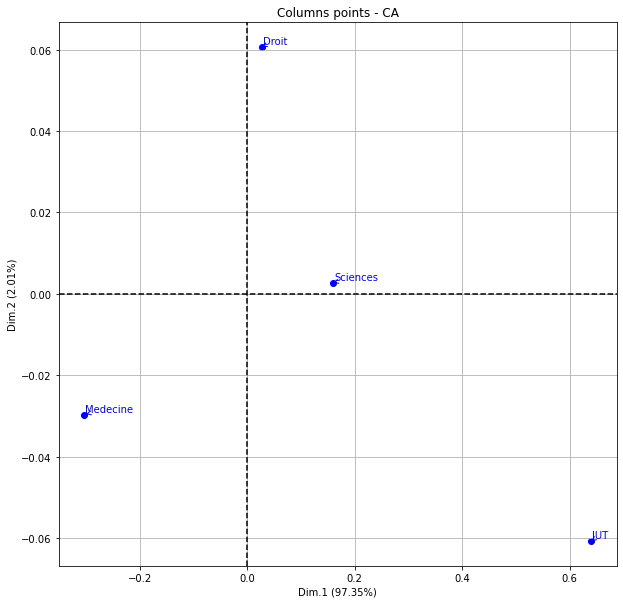

In [25]:
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,choice ="col",color="blue",repel=True,ax=axe)

#### Cosinus carré des profils colonnes

In [26]:
# Cosinus carré des profils colonnes
col_cos2 = col["cos2"]
display(col_cos2)

,Dim.1,Dim.2,Dim.3
Droit,0.165328,0.776896,0.057776
Sciences,0.947735,0.000275,0.051990
Medecine,0.990227,0.009482,0.000291
IUT,0.988797,0.008904,0.002299


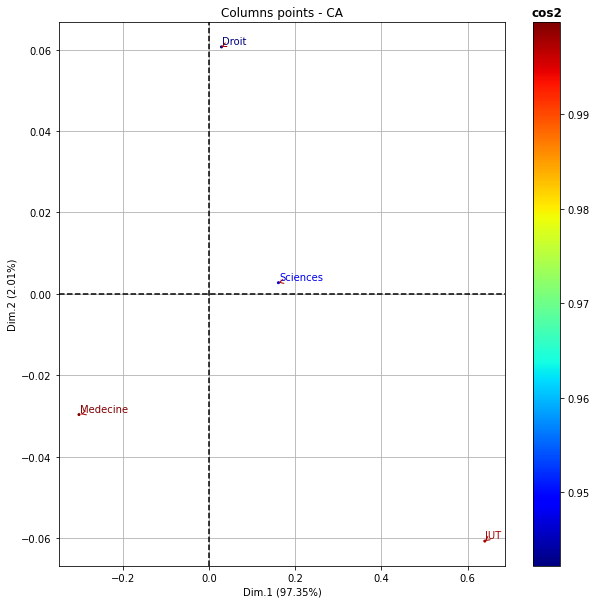

In [27]:
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,choice ="col",color="cos2",repel=True,ax=axe)

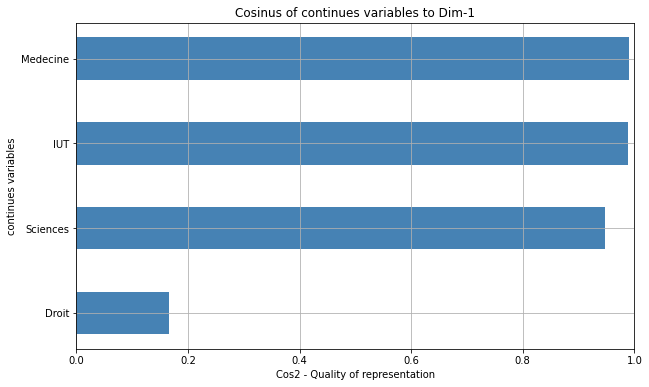

In [28]:
fig, axe = plt.subplots(figsize=(10,6))
plot_cosines(my_ca,choice="var",ax=axe)

#### Contribution des profils colonnes

In [29]:
# Contribution des profils colonnes
col_contrib = col["contrib"]
display(col_contrib)

,Dim.1,Dim.2,Dim.3
Droit,0.258518,58.758560,13.789476
Sciences,7.944621,0.111572,66.520974
Medecine,41.583998,19.259378,1.868040
IUT,50.212862,21.870490,17.821510


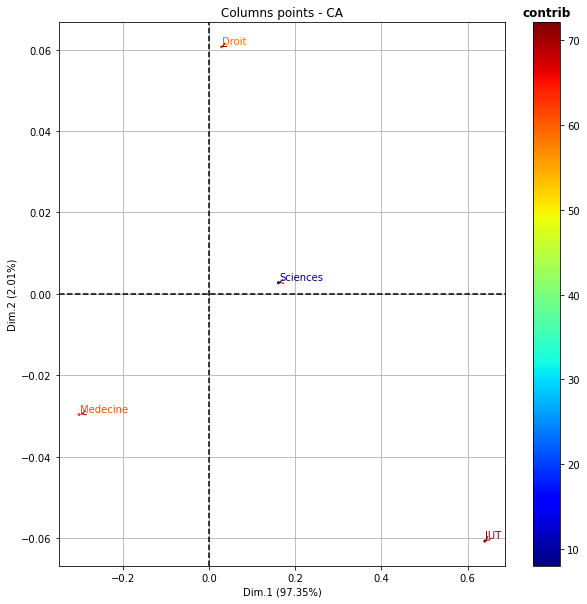

In [30]:
fig,axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,choice ="col",color="contrib",repel=True,ax=axe)

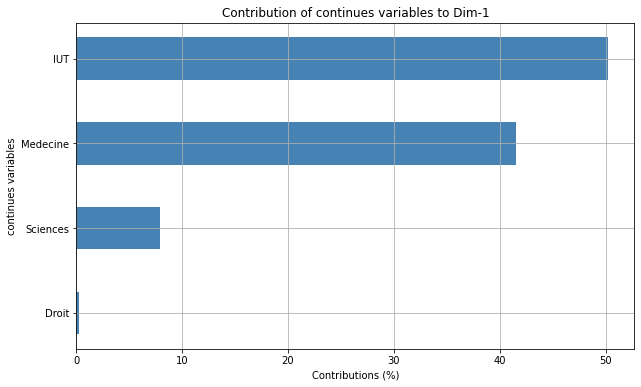

In [31]:
fig,axe = plt.subplots(figsize=(10,6))
plot_contrib(my_ca,choice="var",ax=axe)

#### Distance des profils colonnes

In [32]:
# Distance des profils colonnes
col_dist = col["dist"]
display(col_dist)

,Droit,Sciences,Medecine,IUT
Droit,0.000000,0.023836,0.117924,0.389720
Sciences,0.023836,0.000000,0.217793,0.238840
Medecine,0.117924,0.217793,0.000000,0.891439
IUT,0.389720,0.238840,0.891439,0.000000


#### Distance restituée sur les profils colonnes

In [33]:
# Distance restituée sur les profils colonnes
res_col_dist = col["res.dist"]
display(res_col_dist)

,Droit,Sciences,Medecine,IUT
Droit,0.000000,0.023836,0.117924,0.389720
Sciences,0.023836,0.000000,0.217793,0.238840
Medecine,0.117924,0.217793,0.000000,0.891439
IUT,0.389720,0.238840,0.891439,0.000000


## Autres informations

### Résidus

In [34]:
resid  = pd.DataFrame(my_ca.resid_,index=D.index,columns=D.columns)
display(resid)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,-2.124207,22.223044,-47.611522,27.512685
Patron,11.637685,-9.181290,-6.409355,3.952960
CadreSup,-26.280391,-63.966702,195.483351,-105.236258
Employe,18.006607,14.275370,-39.137685,6.855708
Ouvrier,-1.239693,36.649577,-102.324789,66.914905


### Résidus standardisés

In [35]:
standardized_resid = pd.DataFrame(my_ca.standardized_resid_,index=D.index,columns=D.columns)
display(standardized_resid)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,-0.234402,2.536227,-4.486634,4.982799
Patron,0.930680,-0.759378,-0.437716,0.518839
CadreSup,-1.179691,-2.969686,7.493598,-7.753144
Employe,1.597870,1.310138,-2.965847,0.998476
Ouvrier,-0.095862,2.931024,-6.757022,8.492376


#### Résidus ajustés

In [36]:
adjusted_resid = pd.DataFrame(my_ca.adjusted_resid_,index=D.index,columns=D.columns)
display(adjusted_resid)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,-0.286376,3.061585,-5.906205,5.478264
Patron,1.184421,-0.954873,-0.600219,0.594198
CadreSup,-1.921504,-4.779318,13.151505,-11.364350
Employe,2.000133,1.620380,-4.000168,1.124732
Ouvrier,-0.122765,3.708779,-9.323876,9.787055


#### Contributions

In [37]:
chi2_contribution = pd.DataFrame(my_ca.chi2_contribution_,index=D.index,columns=D.columns)
display(chi2_contribution)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,0.017156,2.008471,6.285367,7.752399
Patron,0.270452,0.180055,0.059824,0.084053
CadreSup,0.434536,2.753661,17.533561,18.769168
Employe,0.797209,0.535949,2.746546,0.311290
Ouvrier,0.002869,2.682429,14.256078,22.518928


#### Indice d'attraction répulsion

In [38]:
# Indice d'attraction - répulsion
iar = pd.DataFrame(my_ca.attraction_repulsion_index_,index=D.index,columns=D.columns)
display(iar)

,Droit,Sciences,Medecine,IUT
CSP_vs_Filiere,,,,
ExpAgri,0.974134,1.289449,0.577206,1.902431
Patron,1.074428,0.937192,0.970107,1.068099
CadreSup,0.947045,0.862131,1.287257,0.428797
Employe,1.141792,1.120239,0.775249,1.145420
Ouvrier,0.992587,1.234407,0.553800,2.077793


##### Log-likelihood test

In [39]:
# Log - likelihood test
log_likelihood_test = pd.DataFrame(my_ca.log_likelihood_test_,index = ["log-likelihood test"])
display(log_likelihood_test)

,statistic,pvalue
log-likelihood test,321.963659,1.134482e-61


#### Others stats

In [40]:
# Others stats
pd.DataFrame(my_ca.contingency_association_,index=["others stats"])

,cramer,tschuprow,pearson
others stats,0.167965,0.156309,0.279343


In [41]:
summaryCA(my_ca,to_markdown=True)

                     Correspondence Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |
|:------------------------|--------:|--------:|--------:|
| Variance                |   0.082 |   0.002 |   0.001 |
| Difference              |   0.081 |   0.001 | nan     |
| % of var.               |  97.35  |   2.013 |   0.638 |
| Cumulative of % of var. |  97.35  |  99.362 | 100     |

Rows

| CSP_vs_Filiere   |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:-----------------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|--------:|-------:|-------:|
| ExpAgri          |    0.17  |  0.08  |    0.014 |   0.41  | 16.292 |  0.987 |  -0.026 |  3.229 |  0.004 |   0.038 | 21.669 |  0.009 |
| Patron           |    0.003 |  0.152 |    0.001 |   0.02  |  0.075 |  0.123 |   0.027 |  6.305 |  0.213 |  -0.047 | 61.868 |  0.664 |

In [42]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="AFC_FOODS",index_col=0) 
display(D)

,Cereals,Muesli,Porridge,BaconEggs,ToastTea,FreshFruit,StewedFruit,Yoghurt
Statement,,,,,,,,
Healthy,14,38,25,18,8,31,28,34
Nutritious,14,28,25,25,7,32,26,31
GoodSummer,42,22,11,13,7,37,16,35
GoodWinter,10,10,32,26,6,11,19,8
Expensive,6,33,5,27,3,9,18,10
QuickEasy,54,33,8,2,15,26,8,20
Tasty,24,21,16,34,11,33,26,26
Economical,24,3,20,3,16,7,3,7
ForATreat,5,3,3,31,4,4,16,17


CA(col_labels=Index(['Cereals', 'Muesli', 'Porridge', 'BaconEggs', 'ToastTea', 'FreshFruit',
       'StewedFruit', 'Yoghurt'],
      dtype='object'),
   figsize=(16, 8),
   row_labels=Index(['Healthy', 'Nutritious', 'GoodSummer', 'GoodWinter', 'Expensive',
       'QuickEasy', 'Tasty', 'Economical', 'ForATreat', 'ForWeekdays',
       'ForWeekends', 'Tasteless', 'TooLongToPrepare', 'FamilyFavourite'],
      dtype='object', name='Statement'))

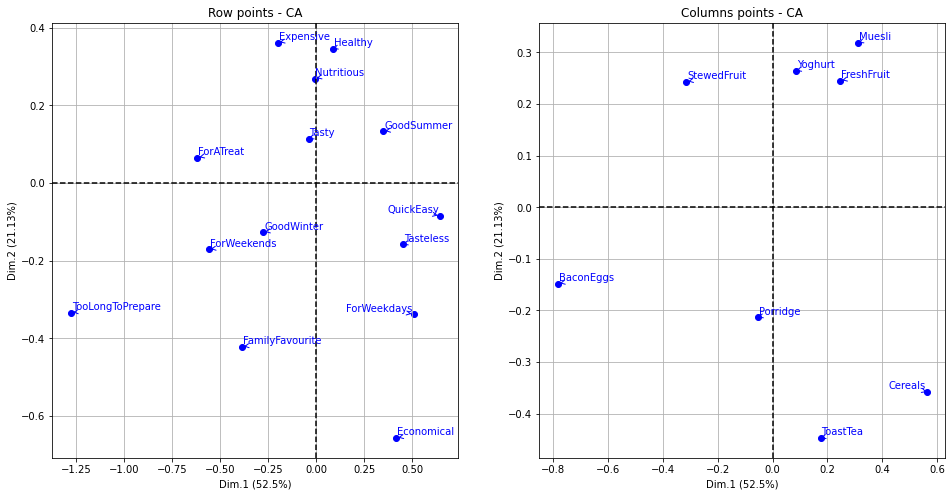

In [43]:
# Instanciation du modèle
my_ca2 = CA(n_components=None,
           row_labels=D.index,
           col_labels=D.columns,
           row_sup_labels=None,
           col_sup_labels=None,
           graph=True,
           figsize=(16,8))
my_ca2.fit(D)

In [44]:
summaryCA(my_ca2)

                     Correspondence Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6  \
Variance                  0.193   0.078   0.044   0.033   0.012   0.006   
Difference                0.115   0.034   0.011   0.021   0.007   0.003   
% of var.                52.501  21.135  11.924   8.919   3.333   1.546   
Cumulative of % of var.  52.501  73.636  85.559  94.479  97.811  99.357   

                           Dim.7  
Variance                   0.002  
Difference                   NaN  
% of var.                  0.643  
Cumulative of % of var.  100.000  

Rows

             d(i,G)   p(i)  I(i,G)  Dim.1     ctr   cos2  Dim.2     ctr  \
Statement                                                                 
Healthy       0.163  0.111   0.018  0.087   0.433  0.046  0.346  17.143   
Nutritious    0.107  0.107   0.011 -0.009   0.004  0.001  0.269   9.934   
GoodSummer    0.220  0.104   0.023  0.34